***TRABAJO PRÁCTICO- REDES NEURONALES***




#Apellido, Nombre, DNI, email de todos los integrantes del grupo

1.   Costilla Alvarez, Maximiliano Miguel DNI 30069813 macostilla83@gmail.com
2.   Zitterspiller, Gabriel Ruben DNI 38199494 gzitterspiller@hotmail.com
3.   Duran Veloso, María Belén DNI 41390247 duranvelosomariabelen@gmail.com
4. Angel javier Boronat
DNI 17453451
javi_boronat@hotmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año. Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos:


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servirá para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

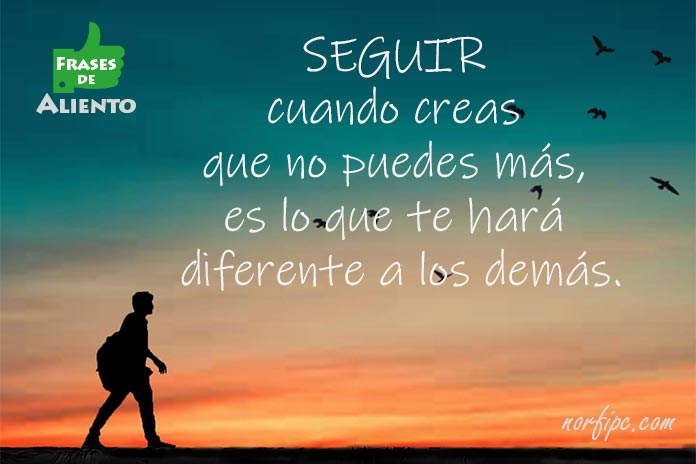

#TEMPERATURA

##Inserción del dataset

In [ ]:
#Inserción de los módulos o bibliotecas necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime, timedelta

In [ ]:
#Importación de los datos

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/registro_temperatura365d_smn_CORR.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,FECHA,TMAX,TMIN,NOMBRE
0,29-10-23,23.0,17.9,AEROPARQUE AERO
1,29-10-23,22.9,14.2,AZUL AERO
2,29-10-23,22.1,8.1,BAHIA BLANCA AERO
3,29-10-23,3.5,-0.3,BARILOCHE AERO
4,29-10-23,-4.7,-11.6,BASE BELGRANO II
...,...,...,...,...
43674,30-10-22,13.9,5.4,VIEDMA AERO
43675,30-10-22,30.6,14.8,VILLA DE MARIA DEL RIO SECO
43676,30-10-22,27.8,12.2,VILLA DOLORES AERO
43677,30-10-22,15.0,9.0,VILLA GESELL AERO


In [ ]:
#Observación de los datos contenidos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 2 to 43560
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   365 non-null    object 
 1   TMAX    365 non-null    float64
 2   TMIN    365 non-null    float64
 3   NOMBRE  365 non-null    object 
dtypes: float64(2), object(2)
memory usage: 14.3+ KB


In [ ]:
df.columns

Index(['FECHA', 'TMAX', 'TMIN', 'NOMBRE'], dtype='object')

In [ ]:
df.head(10)

,FECHA,TMAX,TMIN,NOMBRE
0,29-10-23,23.0,17.9,AEROPARQUE AERO
1,29-10-23,22.9,14.2,AZUL AERO
2,29-10-23,22.1,8.1,BAHIA BLANCA AERO
3,29-10-23,3.5,-0.3,BARILOCHE AERO
4,29-10-23,-4.7,-11.6,BASE BELGRANO II
5,29-10-23,-6.2,-9.4,BASE CARLINI (EX JUBANY)
6,29-10-23,-7.3,-13.7,BASE ESPERANZA
7,29-10-23,-9.5,-19.7,BASE MARAMBIO
8,29-10-23,-3.8,-8.2,BASE ORCADAS
9,29-10-23,-2.4,-12.8,BASE SAN MARTIN


In [ ]:
df.describe()

,TMAX,TMIN
count,41307.000000,42116.000000
mean,22.998235,10.250589
std,10.125030,8.453582
min,-27.600000,-37.600000
25%,17.200000,4.800000
50%,24.000000,11.000000
75%,30.500000,16.800000
max,46.500000,30.000000


##Selección de la ciudad

In [ ]:
df2 = df[df['NOMBRE'].str.contains('BAHIA BLANCA AERO', case=False, na=False)]
df2['FECHA'] = df['FECHA']
df2 = df2[['FECHA', 'TMAX', 'TMIN', 'NOMBRE']]
print(df2)

#Nuevo archivo para mayor prolijidad
df2.to_csv('BAHIA BLANCA AERO.csv', index=False)

          FECHA  TMAX  TMIN             NOMBRE
2      29-10-23  22.1   8.1  BAHIA BLANCA AERO
121    28-10-23  31.4   8.8  BAHIA BLANCA AERO
240    27-10-23  31.7   8.2  BAHIA BLANCA AERO
359    26-10-23  30.1  13.0  BAHIA BLANCA AERO
478    25-10-23  26.1   3.6  BAHIA BLANCA AERO
...         ...   ...   ...                ...
43076   3-11-22  28.4   7.2  BAHIA BLANCA AERO
43197   2-11-22  28.2   9.9  BAHIA BLANCA AERO
43318   1-11-22  25.8   1.3  BAHIA BLANCA AERO
43439  31-10-22  19.8   1.2  BAHIA BLANCA AERO
43560  30-10-22  15.6   6.5  BAHIA BLANCA AERO

[365 rows x 4 columns]


## Inclusión de los datos correspondientes a la ciudad seleccionada en un nuevo DataFrame para su manipulación y análisis.

In [ ]:
data = pd.read_csv('/content/BAHIA BLANCA AERO.csv', encoding='latin-1')
df = pd.DataFrame(data)

df

,FECHA,TMAX,TMIN,NOMBRE
0,29-10-23,22.1,8.1,BAHIA BLANCA AERO
1,28-10-23,31.4,8.8,BAHIA BLANCA AERO
2,27-10-23,31.7,8.2,BAHIA BLANCA AERO
3,26-10-23,30.1,13.0,BAHIA BLANCA AERO
4,25-10-23,26.1,3.6,BAHIA BLANCA AERO
...,...,...,...,...
360,3-11-22,28.4,7.2,BAHIA BLANCA AERO
361,2-11-22,28.2,9.9,BAHIA BLANCA AERO
362,1-11-22,25.8,1.3,BAHIA BLANCA AERO
363,31-10-22,19.8,1.2,BAHIA BLANCA AERO


## Transformación de las temperaturas en formato numérico para calcular el promedio.

In [ ]:
#"TMAX" y "TMIN" a números

df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')

In [ ]:
#Promedio de la temperatura
suma = df['TMAX']+df['TMIN']
promedio = suma / 2

In [ ]:
df['TPROMEDIO'] = promedio

In [ ]:
df.head(10)

,FECHA,TMAX,TMIN,NOMBRE,TPROMEDIO
0,29-10-23,22.1,8.1,BAHIA BLANCA AERO,15.10
1,28-10-23,31.4,8.8,BAHIA BLANCA AERO,20.10
2,27-10-23,31.7,8.2,BAHIA BLANCA AERO,19.95
3,26-10-23,30.1,13.0,BAHIA BLANCA AERO,21.55
4,25-10-23,26.1,3.6,BAHIA BLANCA AERO,14.85
5,24-10-23,19.2,6.1,BAHIA BLANCA AERO,12.65
6,23-10-23,14.0,11.4,BAHIA BLANCA AERO,12.70
7,22-10-23,19.1,12.0,BAHIA BLANCA AERO,15.55
8,21-10-23,28.2,16.0,BAHIA BLANCA AERO,22.10
9,20-10-23,27.0,8.6,BAHIA BLANCA AERO,17.80


#Gráfico de los datos obtenidos

In [ ]:
# Datos para el gráfico
y = df['TPROMEDIO']
x = df['FECHA']

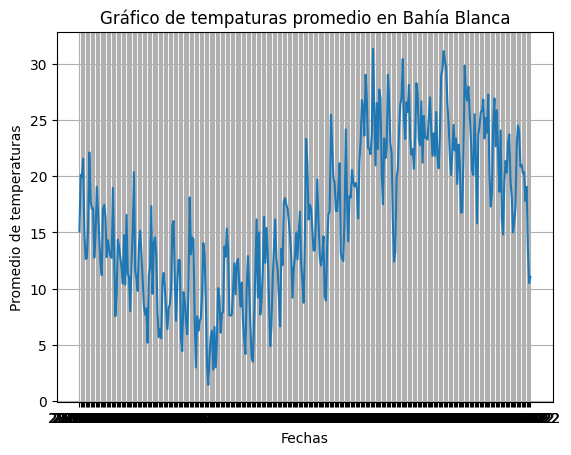

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Creación del gráfico de línea
plt.plot(x, y)

# Título y etiquetas
plt.xlabel('Fechas')
plt.ylabel('Promedio de temperaturas')
plt.title('Gráfico de tempaturas promedio en Bahía Blanca')
plt.grid(True)
plt.figure(figsize=(10, 6))

# Mostrar el gráfico
plt.show()

## Precio del kilo de helado

In [ ]:
# Rango de precios del helado y el porcentaje de incremento
precio_inicial = 500
incremento_por_grado = 0.01
temperatura_actual = df['TPROMEDIO']
precios_helado = precio_inicial + (temperatura_actual * incremento_por_grado)


##Columna "COMPRA HELADO", basada en la probabilidad

In [ ]:
# Probabilidad de no compra
probabilidad_no_compra = 0.8

# Determinación de si se compra helado o no en función de la temperatura
def decide_compra_helado(fila):
    temperatura = fila['TMAX']
    if temperatura < 20:
        return 'NO' #np.random.choice(['SI', 'NO'], p=[1 - probabilidad_no_compra, probabilidad_no_compra])
    else:
        return 'SI'  # Si la temperatura no es mayor a 20 grados, se compra helado con certeza


#Nuevas columnas al DataFrame
data['PRECIO DEL HELADO POR KG'] = precios_helado
#Función para generar la columna "COMPRA HELADO" condicionada
data['COMPRA DEL HELADO'] = df.apply(decide_compra_helado, axis=1)

#Resultado
print(data)

        FECHA  TMAX  TMIN             NOMBRE  TPROMEDIO  \
0    29-10-23  22.1   8.1  BAHIA BLANCA AERO      15.10   
1    28-10-23  31.4   8.8  BAHIA BLANCA AERO      20.10   
2    27-10-23  31.7   8.2  BAHIA BLANCA AERO      19.95   
3    26-10-23  30.1  13.0  BAHIA BLANCA AERO      21.55   
4    25-10-23  26.1   3.6  BAHIA BLANCA AERO      14.85   
..        ...   ...   ...                ...        ...   
360   3-11-22  28.4   7.2  BAHIA BLANCA AERO      17.80   
361   2-11-22  28.2   9.9  BAHIA BLANCA AERO      19.05   
362   1-11-22  25.8   1.3  BAHIA BLANCA AERO      13.55   
363  31-10-22  19.8   1.2  BAHIA BLANCA AERO      10.50   
364  30-10-22  15.6   6.5  BAHIA BLANCA AERO      11.05   

     PRECIO DEL KILO DE HELADO COMPRA HELADO  PRECIO DEL HELADO POR KG  \
0                     500.1510            SI                  500.1510   
1                     500.2010            SI                  500.2010   
2                     500.1995            SI                  500.199

# Separamos datos para la empezar lo que seria nuestra red neuronal

In [ ]:
temperatura = data['TPROMEDIO'].values
compra_helado = (data['COMPRA HELADO'] == 'SI').astype(int).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(temperatura, compra_helado, test_size=0.2, random_state=42)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),verbose=0)


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


3/3 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.8493
Precisión en el conjunto de prueba: 84.93%


#Prueba

In [ ]:
#Temperatura de prueba
temperatura_prueba = np.array([27.0])

#Predicción con el modelo
prediccion = model.predict(temperatura_prueba)
print(prediccion)

if prediccion > umbral:
    decision = 'comprar Helado'
else:
    decision = 'no Comprar Helado'

print(f'Para una temperatura de {temperatura_prueba[0]} grados, se decide {decision}')

1/1 [==============================] - 0s 20ms/step
[[0.99983376]]
Para una temperatura de 27.0 grados, se decide comprar Helado
